# Predicting Car Prices

In this project, I will practice the machine learning workflow by using self-defined function to predict a car's market price using its attributes.. The data set I will be working with contains information on various cars. You can read more about the data set [here](https://archive.ics.uci.edu/ml/datasets/automobile) and it can be downloaded directly from [here](https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data).

### Summary of results
In this project, I defined several functions to predict the car prices. The findings are following:

- For Univariate k-nearest neighbors model, the best feature is 'engine-size'and the optimal k value is 3. The RMSE is 2840.
- For Multivariate k-nearest neighbors model, the best features combination is 'engine-size'and 'horsepower', the optimal k value is 2. The RMSE is 2657.

## Reading in Data

In [ ]:
import pandas as pd

# column names from the documentation of the dataset
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/Users/LeungHoChuen/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-16-8645800934fe>", line 7, in <module>
    cars = pd.read_csv('imports-85.data', names=cols)
  File "/Users/LeungHoChuen/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 676, in parser_f
    return _read(filepath_or_buffer, kwds)
  File "/Users/LeungHoChuen/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 448, in _read
    parser = TextFileReader(fp_or_buf, **kwds)
  File "/Users/LeungHoChuen/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 880, in __init__
    self._make_engine(self.engine)
  File "/Users/LeungHoChuen/opt/anaconda3/lib/python3.8/site-packages/pandas/io/parsers.py", line 1114, in _make_engine
    self._engine = CParserWrapper(self.f, **self.options)
  File "/Users/LeungHo

In [16]:
# primary exploration of the data
cars.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


ERROR! Session/line number was not unique in database. History logging moved to new session 10


In [17]:
# select only numeric columns for machine learing features

numeric_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 
                'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

numeric_cars = cars[numeric_cols]

In [18]:
numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495
1,?,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500
2,?,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500
3,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950
4,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450


## Data cleaning

In [19]:
# replace all of the ? values with numpy.nan.
import numpy as np

numeric_cars = numeric_cars.replace('?', np.nan)

In [20]:
# convert all non-numeric columns to numeric types
numeric_cars = numeric_cars.astype('float')

In [21]:
# find out the number of rows that have a missing value for the normalized-losses column
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [22]:
# as 'price' is the column I want to predict, the rows with missing value in 'price' will be dropped
numeric_cars = numeric_cars.dropna(subset=['price'])
numeric_cars.isnull().sum()

normalized-losses    37
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 0
dtype: int64

In [23]:
# the other missing values will be replaced with the average values from that column
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [24]:
# normalize all columnns to range from 0 to 1 except 'price'.
price = numeric_cars['price']
numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
numeric_cars['price'] = price

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


## Univariate k-nearest neighbors model

### Finding the column which perform the best using the default k value

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target_col, df):
    '''
    The function takes in 3 parameters:
    (training column name, target column name, and the dataframe object),
    it split the data set into a training and test set,
    instantiate the KNeighborsRegressor class, 
    fit the model on the training set, and make predictions on the test set.
    Finally, it should calculate the RMSE and return that value.
    '''
    knn = KNeighborsRegressor()
    np.random.seed(1)
    
    # randomly shuffle index
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # divide the number of rows into half
    half_index = round(len(df)/2)
    
    # specrate dataset into training set and test set
    train_set = df.iloc[:half_index].copy()
    test_set = df.iloc[half_index:].copy()
    
    # fit the model on the training set
    knn.fit(train_set[[train_col]], train_set[target_col])
    
    # make predictions on the test set
    predictions = knn.predict(test_set[[train_col]])
    
    # calculate the RMSE
    rmse = np.sqrt(mean_squared_error(predictions, test_set[target_col]))
    
    return rmse

In [26]:
# test univariate models using the different numeric columns in the data set
rmses = {}
numeric_cols.remove('price')

for col in numeric_cols:
    rmses[col] = knn_train_test(col, 'price', numeric_cars)

rmse_series = pd.Series(rmses)
rmse_series.sort_values()

engine-size          3238.462830
horsepower           4037.037713
curb-weight          4401.118255
highway-mpg          4630.026799
width                4704.482590
city-mpg             4766.422505
length               5427.200961
wheel-base           5461.553998
compression-rate     6610.812153
bore                 6780.627785
normalized-losses    7330.197653
peak-rpm             7697.459696
stroke               8006.529545
height               8144.441043
dtype: float64

For Univariate k-nearest neighbors model, 'engine-size' performed the best using the default k value. The RMSE value is 3297.

### Finding the column which perform the best and the best k value

In [27]:
def knn_train_test(train_col, target_col, df):
    '''
    The modified function calculates the RMSE for the following k values
    (1, 3, 5, 7 and 9) for the input column
    and return a dictionary of the RMSE.
    '''

    np.random.seed(1)
    
    # randomly shuffle index
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # divide the number of rows into half
    half_index = round(len(df)/2)
    
    # specrate dataset into training set and test set
    train_set = df.iloc[:half_index].copy()
    test_set = df.iloc[half_index:].copy()
    
    k_values = [1, 3, 5, 7, 9]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # fit the model on the training set
        knn.fit(train_set[[train_col]], train_set[target_col])
    
        # make predictions on the test set
        predictions = knn.predict(test_set[[train_col]])
    
        # calculate the RMSE
        rmse = np.sqrt(mean_squared_error(predictions, test_set[target_col]))
        
        k_rmses[k] = rmse
    return k_rmses

In [28]:
# test univariate models using the different numeric columns in the data set
k_rmses_results = {}

for col in numeric_cols:
    k_rmses_results[col] = knn_train_test(col, 'price', numeric_cars)

k_rmses_results

{'normalized-losses': {1: 7846.750605148984,
  3: 7500.5698123109905,
  5: 7330.197653434445,
  7: 7756.421586234123,
  9: 7688.096096891432},
 'wheel-base': {1: 4493.734068810494,
  3: 5120.161506064513,
  5: 5461.553997873057,
  7: 5448.1070513823315,
  9: 5738.405685192312},
 'length': {1: 4628.45550121557,
  3: 5129.8358210721635,
  5: 5427.2009608367125,
  7: 5313.427720847974,
  9: 5383.054514833446},
 'width': {1: 4559.257297950061,
  3: 4606.413692169901,
  5: 4704.482589704386,
  7: 4571.485046194653,
  9: 4652.914172067787},
 'height': {1: 8904.04645636071,
  3: 8277.609643045525,
  5: 8144.441042663747,
  7: 7679.598124393773,
  9: 7811.03606291223},
 'curb-weight': {1: 5264.290230758878,
  3: 5022.318011757233,
  5: 4401.118254793124,
  7: 4330.608104418053,
  9: 4632.044474454401},
 'engine-size': {1: 3258.4861059962027,
  3: 2840.562805643501,
  5: 3238.4628296477176,
  7: 3563.086774256415,
  9: 3831.8244149840766},
 'bore': {1: 8602.58848450066,
  3: 6984.239489480916,


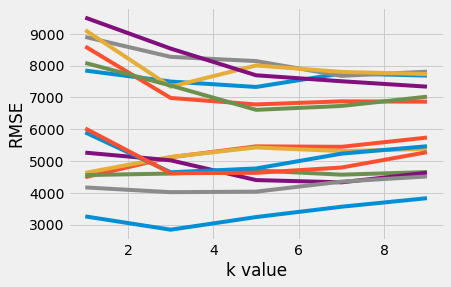

In [29]:
# visualize the results using a line plot
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')
for key, value in k_rmses_results.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y, label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

'engine-size' is the best feature for the Univariate k-nearest neighbors model and RMSE is the lowest when k = 3. The RMSE value is 2840.

## Multivariate k-nearest neighbors model

### Finding the list of columns which perform the best using the default k value

In [30]:
def knn_train_test(train_col_list, target_col, df):
    '''
    The modified function takes in 3 parameters:
    (list of training column name, target column name, and the dataframe object),
    calculate the RMSE and return that value.
    '''

    np.random.seed(1)
    
    # randomly shuffle index
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # divide the number of rows into half
    half_index = round(len(df)/2)
    
    # specrate dataset into training set and test set
    train_set = df.iloc[:half_index].copy()
    test_set = df.iloc[half_index:].copy()
    
    k_values = [5]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # fit the model on the training set
        knn.fit(train_set[train_col_list], train_set[target_col])
    
        # make predictions on the test set
        predictions = knn.predict(test_set[train_col_list])
    
        # calculate the RMSE
        rmse = np.sqrt(mean_squared_error(predictions, test_set[target_col]))
        
        k_rmses[k] = rmse
    return k_rmses

In [31]:
# find the best features by calculating the mean rmse
feature_mean_rmse = {}

for key,value in k_rmses_results.items():
    mean_rmse = np.mean(list(value.values()))
    feature_mean_rmse[key] = mean_rmse
    
feature_mean_rmse_series = pd.Series(feature_mean_rmse).sort_values()
print(feature_mean_rmse_series)

engine-size          3346.484586
horsepower           4219.377860
width                4618.910560
curb-weight          4730.075815
highway-mpg          5069.469256
length               5176.394904
city-mpg             5202.409003
wheel-base           5252.392462
compression-rate     7166.073599
bore                 7222.472445
normalized-losses    7624.407151
stroke               8000.240467
peak-rpm             8119.365233
height               8163.346266
dtype: float64


In [32]:
# test multivariate models using the best 2 to 5 columns

for n in range(2,6):
    rmse_result = knn_train_test(feature_mean_rmse_series.index[:n], 'price', numeric_cars)
    print('For best {} features: {}'.format(n, rmse_result))

For best 2 features: {5: 2949.8817277180374}
For best 3 features: {5: 3580.7376651928435}
For best 4 features: {5: 3487.340917327035}
For best 5 features: {5: 3410.2170133901805}


### Finding the list of columns which perform the best and the best k value

In [33]:
def knn_train_test(train_col_list, target_col, df):
    '''
    The modified function calculates the RMSE for the k values
    from 1 to 25 for the input column
    and return a dictionary of the RMSE.
    '''

    np.random.seed(1)
    
    # randomly shuffle index
    shuffled_index = np.random.permutation(df.index)
    df = df.reindex(shuffled_index)
    
    # divide the number of rows into half
    half_index = round(len(df)/2)
    
    # specrate dataset into training set and test set
    train_set = df.iloc[:half_index].copy()
    test_set = df.iloc[half_index:].copy()
    
    k_values = [i for i in range(1, 25)]
    k_rmses = {}
    
    for k in k_values:
        knn = KNeighborsRegressor(n_neighbors=k)
        
        # fit the model on the training set
        knn.fit(train_set[train_col_list], train_set[target_col])
    
        # make predictions on the test set
        predictions = knn.predict(test_set[train_col_list])
    
        # calculate the RMSE
        rmse = np.sqrt(mean_squared_error(predictions, test_set[target_col]))
        
        k_rmses[k] = rmse
    return k_rmses

In [34]:
# test multivariate models using the best 2 to 5 columns
k_rmse_result = {}

for n in range(2,6):
    k_rmse_result['{} best features'.format(n)] = knn_train_test(
        feature_mean_rmse_series.index[:n], 
        'price', 
        numeric_cars
    )
    
k_rmse_result

{'2 best features': {1: 2783.6204237227344,
  2: 2657.7963807419765,
  3: 2792.586573031673,
  4: 2891.5329686923255,
  5: 2949.8817277180374,
  6: 3096.402601694776,
  7: 3164.681969020496,
  8: 3413.228359192009,
  9: 3748.6716603306486,
  10: 4080.7125057341937,
  11: 4215.6372280600335,
  12: 4275.421524277872,
  13: 4373.901683035496,
  14: 4424.285137239815,
  15: 4539.505493095937,
  16: 4667.307671446768,
  17: 4729.605305844226,
  18: 4790.556632159094,
  19: 4824.3866193292615,
  20: 4840.850914693829,
  21: 4837.429062000271,
  22: 4831.16988267597,
  23: 4861.679492959275,
  24: 4903.346008862579},
 '3 best features': {1: 3399.8148100410203,
  2: 3497.191103423058,
  3: 3333.6966577570593,
  4: 3355.8842294742026,
  5: 3580.7376651928435,
  6: 3732.943016673517,
  7: 3639.9439408462786,
  8: 3747.4209132113137,
  9: 3986.593913133887,
  10: 4005.354888715163,
  11: 4121.687230061635,
  12: 4255.700651624227,
  13: 4328.476829895253,
  14: 4332.216494947217,
  15: 4388.22571

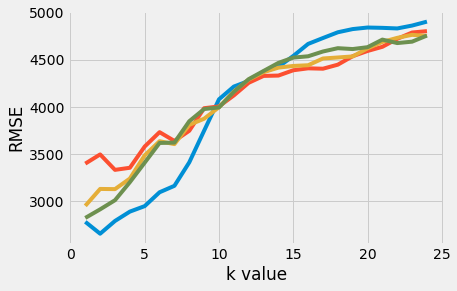

In [35]:
# visualize the results using a line plot

plt.style.use('fivethirtyeight')
for key, value in k_rmse_result.items():
    x = list(value.keys())
    y = list(value.values())
    
    plt.plot(x,y, label = k)
    plt.xlabel('k value')
    plt.ylabel('RMSE')

'engine-size' and 'horsepower' are the best features for the multivariate k-nearest neighbors model, while k value is optimal when it is equal to 2. The RMSE is 2657

## Interim conclusion
In this project, I defined several functions to predict the car prices. The findings are following:

- For Univariate k-nearest neighbors model, the best feature is 'engine-size'and the optimal k value is 3. The RMSE is 2840.
- For Multivariate k-nearest neighbors model, the best features combination is 'engine-size'and 'horsepower', the optimal k value is 2. The RMSE is 2657.

## Further Study
Here are some ideas for next steps:

- Modify the knn_train_test() function to use k-fold cross validation instead of test/train validation.
- Modify the knn_train_test() function to perform the data cleaning as well.